In [1]:
# Initial imports
import os
import pandas as pd
import numpy as np
import seaborn as sns
import alpaca_trade_api as tradeapi
import matplotlib.pyplot as plt
import panel as pn 
import pandas_ta as ta
from MCForecastTools import MCSimulation
pn.extension('plotly')



%matplotlib inline

In [2]:
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

In [4]:
# Tickers
ticker = ["BABA", "DIS", "TSLA", "SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data 
all_stocks_df = alpaca.get_barset(
    ticker,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
all_stocks_df.head()

BABA                                       DIS  \
                             open    high     low   close    volume    open   
time                                                                          
2017-06-05 00:00:00-04:00  124.00  125.56  123.87  125.37   8021032  104.63   
2017-06-06 00:00:00-04:00  125.60  126.20  124.27  124.63   7974948  106.17   
2017-06-07 00:00:00-04:00  125.08  125.91  124.11  125.67   7319114  105.79   
2017-06-08 00:00:00-04:00  142.51  143.70  135.21  142.38  62224198  103.19   
2017-06-09 00:00:00-04:00  144.57  148.29  137.01  139.36  46078639  104.29   

                                                                SPY          \
                              high     low   close   volume    open    high   
time                                                                          
2017-06-05 00:00:00-04:00  106.875  103.72  106.51  5302320  243.98  244.30   
2017-06-06 00:00:00-04:00  106.190  104.61  105.51  8287158  243.31  243.98   
2017-06-07 00:00:00-04:00  106.250  103.43  103.52  4621500  243.60  243.92   
2017-06-08 00:00:00-04:00  104.490  101.80  104.32  8839933  243.77  244.33   
2017-06-09 00:00:00-04:00  105.920  104.08  105.62  7628117  244.09  245.01   

                                                         TSLA            \
                              low    close     volume    open      high   
time                                                                      
2017-06-05 00:00:00-04:00  243.76  243.965   27596403  338.50  348.4400   
2017-06-06 00:00:00-04:00  243.12  243.250   36562468  344.95  359.4929   
2017-06-07 00:00:00-04:00  242.83  243.650   38602639  356.30  360.5000   
2017-06-08 00:00:00-04:00  243.17  243.760   48051333  363.75  371.9000   
2017-06-09 00:00:00-04:00  241.95  243.450  103578275  374.42  376.8700   

                                                     
                              low   close    volume  
time                                                 
2017-06-05 00:00:00-04:00  334.21  347.32   5684288  
2017-06-06 00:00:00-04:00  344.66  352.80   9465968  
2017-06-07 00:00:00-04:00  355.14  359.55   7850542  
2017-06-08 00:00:00-04:00  360.22  370.01   7489685  
2017-06-09 00:00:00-04:00  354.80  357.45  14323526

In [5]:
all_stocks_df.isnull().sum()

BABA  open      0
      high      0
      low       0
      close     0
      volume    0
DIS   open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [6]:
df = all_stocks_df.dropna()

df.isnull().sum()

BABA  open      0
      high      0
      low       0
      close     0
      volume    0
DIS   open      0
      high      0
      low       0
      close     0
      volume    0
SPY   open      0
      high      0
      low       0
      close     0
      volume    0
TSLA  open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [7]:
df.tail()

BABA                                       DIS  \
                              open    high     low   close    volume    open   
time                                                                           
2021-05-18 00:00:00-04:00  212.540  215.17  211.42  213.73  18741751  170.26   
2021-05-19 00:00:00-04:00  211.000  212.91  210.12  212.54  15573925  167.80   
2021-05-20 00:00:00-04:00  212.995  217.63  212.63  216.91  17416865  169.00   
2021-05-21 00:00:00-04:00  215.230  215.89  209.87  211.09  20633912  172.50   
2021-05-24 00:00:00-04:00  210.100  212.01  208.70  210.28  12012615  172.54   

                                                                  SPY  \
                               high      low   close   volume    open   
time                                                                    
2021-05-18 00:00:00-04:00  171.2600  169.450  169.67  9504650  415.80   
2021-05-19 00:00:00-04:00  169.3500  167.095  169.30  8209406  406.92   
2021-05-20 00:00:00-04:00  171.9000  168.975  171.36  6515309  411.80   
2021-05-21 00:00:00-04:00  173.1185  171.520  172.46  7138200  416.87   
2021-05-24 00:00:00-04:00  175.1100  171.750  174.32  6406229  417.34   

                                                                 TSLA          \
                              high      low   close    volume    open    high   
time                                                                            
2021-05-18 00:00:00-04:00  416.060  411.770  411.99  52318865  568.39  596.25   
2021-05-19 00:00:00-04:00  411.050  405.335  410.90  94165741  552.37  566.21   
2021-05-20 00:00:00-04:00  416.625  411.670  415.24  69426295  574.99  588.85   
2021-05-21 00:00:00-04:00  418.200  414.450  414.95  66392970  595.78  596.68   
2021-05-24 00:00:00-04:00  420.320  417.080  419.12  45514589  581.45  614.48   

                                                       
                              low     close    volume  
time                                                   
2021-05-18 00:00:00-04:00  563.38  577.6900  35444404  
2021-05-19 00:00:00-04:00  546.98  563.4596  36854713  
2021-05-20 00:00:00-04:00  571.07  586.7000  28905392  
2021-05-21 00:00:00-04:00  580.00  580.8900  24381519  
2021-05-24 00:00:00-04:00  573.65  606.8700  32962329

In [8]:
# Create and empty DataFrame for closing prices
all_closing_prices = pd.DataFrame()

# Fetch the closing prices 
all_closing_prices["BABA"] = all_stocks_df["BABA"]["close"]
all_closing_prices["SPY"] = all_stocks_df["SPY"]["close"]
all_closing_prices["DIS"] = all_stocks_df["DIS"]["close"]
all_closing_prices["TSLA"] = all_stocks_df["TSLA"]["close"]


# Drop the time component of the date
all_closing_prices.index = all_closing_prices.index.date

# Compute daily returns
all_returns = all_closing_prices.pct_change().dropna()

# Display
all_returns.head()

,BABA,SPY,DIS,TSLA
2017-06-06,-0.005903,-0.002931,-0.009389,0.015778
2017-06-07,0.008345,0.001644,-0.018861,0.019133
2017-06-08,0.132967,0.000451,0.007728,0.029092
2017-06-09,-0.021211,-0.001272,0.012462,-0.033945
2017-06-12,-0.001866,-0.000452,0.013539,0.004308


In [9]:

all_returns.index.dtype

dtype('O')

<AxesSubplot:title={'center':'Cumulative Returns'}>

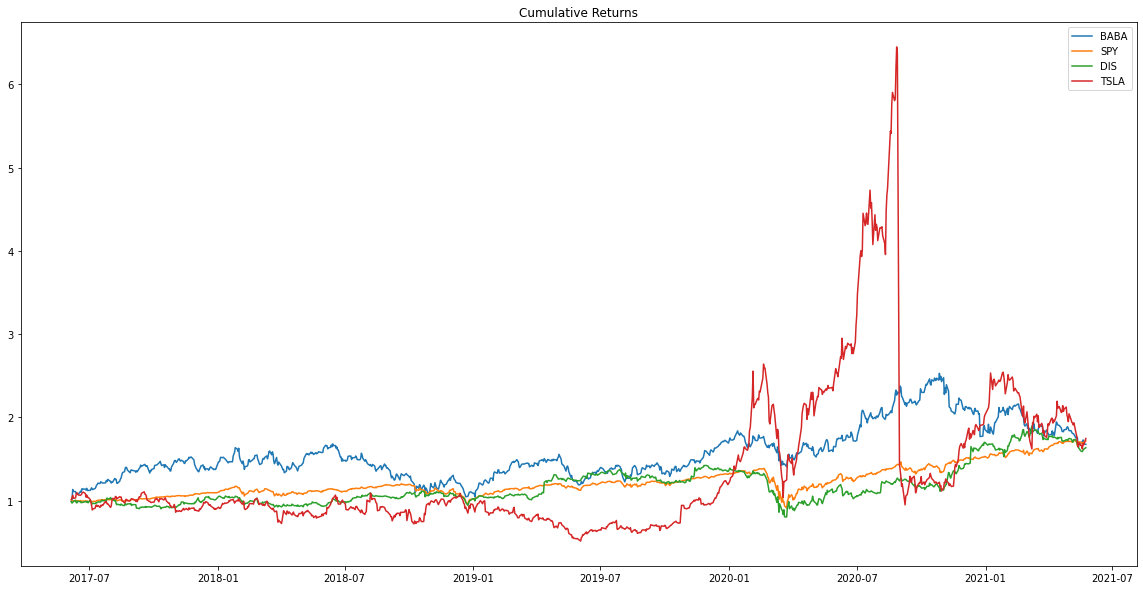

In [10]:
# Calculate Cumulative Returns
all_cumulative_returns = (1 + all_returns).cumprod()

# Plot Cummulative Returns
all_cumulative_returns.plot(title = 'Cumulative Returns', figsize = (20,10) )

<AxesSubplot:ylabel='Density'>

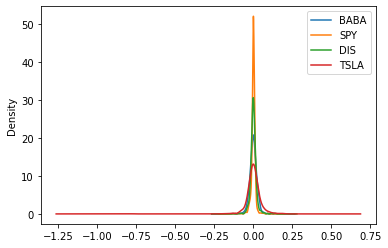

In [11]:
all_returns.plot.density()

In [12]:
# Calculate Standard Deviation
all_std = all_returns.std()

# Calculate Annual Standard Deviation
all_annual_std = all_std * np.sqrt(252)

# Display Standard Deviation
all_annual_std

BABA    0.357224
SPY     0.208536
DIS     0.313140
TSLA    0.748926
dtype: float64

In [13]:
# Calculate Correlation
all_correlation = all_returns.corr()

<AxesSubplot:>

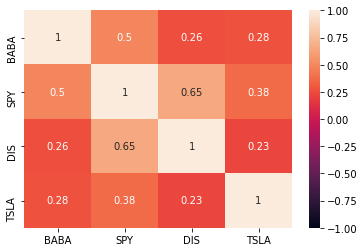

In [14]:
# Plot Correlation 
sns.heatmap(all_correlation, vmin = -1, vmax = 1, annot = True)

In [15]:
# Calculate Covariance
baba_spy_covar = all_returns['BABA'].rolling(window = 60).cov(all_returns['SPY'])
dis_spy_covar = all_returns['DIS'].rolling(window = 60).cov(all_returns['SPY'])
tsla_spy_covar = all_returns['TSLA'].rolling(window = 60).cov(all_returns['SPY'])



In [16]:
# Calculate Variance
baba_spy_var = all_returns['SPY'].rolling(window = 60).var()
dis_spy_var = all_returns['SPY'].rolling(window = 60).var()
tsla_spy_var = all_returns['SPY'].rolling(window = 60).var()


In [17]:
# Calculate Beta
baba_beta = baba_spy_covar / baba_spy_var
dis_beta = dis_spy_covar / dis_spy_var
tsla_beta = tsla_spy_covar / tsla_spy_var

combined_beta = baba_beta + dis_beta + tsla_beta 

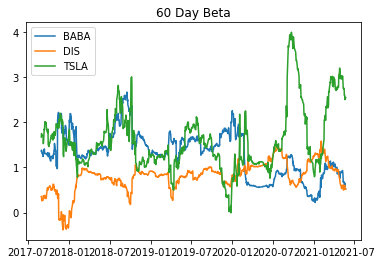

<Figure size 1440x1440 with 0 Axes>

In [18]:
# Plot Beta

baba_beta_plot = plt.plot(baba_beta, label = "BABA")
dis_beta_plot = plt.plot(dis_beta, label = "DIS" )
tsla_beta_plot = plt.plot(tsla_beta, label = "TSLA")

plt.title("60 Day Beta")
plt.legend()
fig_size = plt.figure()
fig_size.set_figwidth(20)
fig_size.set_figheight(20)

# Display
plt.show()

In [19]:
# Calculate the Sharpe Ratio
all_sharpe_ratios = (all_returns.mean() * 252) / (all_returns.std() * np.sqrt(252))
# Display Sharpe Ratio
all_sharpe_ratios

BABA    0.543811
SPY     0.759669
DIS     0.551906
TSLA    0.700917
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

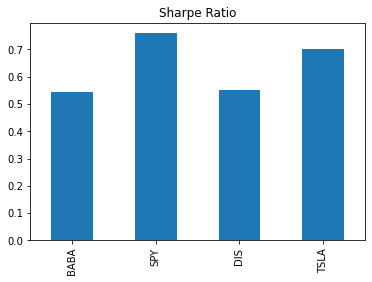

In [20]:
# Plot Sharpe Ratio
all_sharpe_ratios.plot(kind = "bar", title = "Sharpe Ratio")


In [21]:
ticker2 = ["BABA"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
baba_df = alpaca.get_barset(  
    ticker2,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# Display sample data
baba_df.head(10)

BABA                                   
                             open     high     low   close    volume
time                                                                
2017-06-05 00:00:00-04:00  124.00  125.560  123.87  125.37   8021032
2017-06-06 00:00:00-04:00  125.60  126.200  124.27  124.63   7974948
2017-06-07 00:00:00-04:00  125.08  125.910  124.11  125.67   7319114
2017-06-08 00:00:00-04:00  142.51  143.700  135.21  142.38  62224198
2017-06-09 00:00:00-04:00  144.57  148.290  137.01  139.36  46078639
2017-06-12 00:00:00-04:00  139.28  142.200  136.05  139.10  27531987
2017-06-13 00:00:00-04:00  141.81  142.244  135.90  136.45  33762441
2017-06-14 00:00:00-04:00  137.80  139.250  135.26  136.68  25584146
2017-06-15 00:00:00-04:00  135.64  135.670  133.10  135.01  25781627
2017-06-16 00:00:00-04:00  136.28  136.500  133.55  134.90  29647562

In [22]:
# BABA: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
baba_MC_fiveyear = MCSimulation(
    portfolio_data = baba_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
baba_MC_fiveyear.portfolio_data.head()

BABA                                    \
                             open    high     low   close    volume   
time                                                                  
2017-06-05 00:00:00-04:00  124.00  125.56  123.87  125.37   8021032   
2017-06-06 00:00:00-04:00  125.60  126.20  124.27  124.63   7974948   
2017-06-07 00:00:00-04:00  125.08  125.91  124.11  125.67   7319114   
2017-06-08 00:00:00-04:00  142.51  143.70  135.21  142.38  62224198   
2017-06-09 00:00:00-04:00  144.57  148.29  137.01  139.36  46078639   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.005903  
2017-06-07 00:00:00-04:00     0.008345  
2017-06-08 00:00:00-04:00     0.132967  
2017-06-09 00:00:00-04:00    -0.021211

In [23]:
# BABA: Running a Monte Carlo simulation to forecast 5 years cumulative returns
baba_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.021442,0.944741,1.008043,1.009317,0.984140,0.956399,1.022801,0.962948,0.984887,1.018971,...,0.974306,1.035216,1.017452,0.965910,0.986971,0.971138,0.967601,0.979480,1.002054,1.037339
2,1.011743,0.954010,1.029291,1.025796,0.971324,0.996898,1.024974,0.965213,0.960159,0.997853,...,0.946371,1.022238,1.029495,0.962894,0.983548,0.988412,0.964065,0.976807,0.975769,1.015418
3,0.990373,0.951981,1.034611,1.049884,1.010634,1.018029,1.011588,0.985731,0.965657,0.987456,...,0.900839,1.011644,1.011254,0.934293,0.956478,0.995887,0.966187,0.961494,0.915618,1.038137
4,0.979532,0.963117,1.026076,1.086341,1.031732,1.019118,1.039938,1.000822,0.968827,1.013847,...,0.870271,1.035345,1.031854,0.892827,0.928458,0.969274,0.949821,0.985017,0.890797,0.974540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.661787,0.531499,1.689016,6.548197,1.729849,3.173755,3.778851,2.204142,1.363268,0.650807,...,2.602714,1.378239,2.632397,0.995406,2.547745,0.785193,3.188876,0.625803,2.223655,0.909968
1257,2.598513,0.518194,1.710402,6.424528,1.727170,3.037071,3.722543,2.233746,1.368746,0.672471,...,2.589658,1.347721,2.586875,0.956405,2.508584,0.772003,3.257033,0.639360,2.164110,0.913305
1258,2.659441,0.519888,1.670981,6.367047,1.822834,3.093279,3.669443,2.330231,1.388196,0.677763,...,2.464560,1.388659,2.478745,0.957568,2.556611,0.765904,3.335638,0.633721,2.081055,0.914171
1259,2.681014,0.517869,1.725036,6.112465,1.836050,3.104588,3.530664,2.344022,1.383255,0.659906,...,2.393585,1.448886,2.597978,0.936569,2.624502,0.765317,3.311225,0.642240,2.092674,0.880274


In [51]:
# BABA: Fetch summary statistics from the Monte Carlo simulation results
baba_MC_summary = baba_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(baba_MC_summary)

count           1000.000000
mean               2.718034
std                2.638223
min                0.117748
25%                1.058077
50%                1.871980
75%                3.307385
max               20.564203
95% CI Lower       0.366729
95% CI Upper      10.850463
Name: 1260, dtype: float64


In [25]:
# BABA: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
baba_ci_lower = round(baba_MC_summary[8]*10000,2)
baba_ci_upper = round(baba_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${baba_ci_lower} and ${baba_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $3667.29 and $108504.63.


In [26]:
ticker3 = ["SPY"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
spy_df = alpaca.get_barset(  
    ticker3,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
spy_df.head(10)

SPY                                      
                             open    high       low    close     volume
time                                                                   
2017-06-05 00:00:00-04:00  243.98  244.30  243.7600  243.965   27596403
2017-06-06 00:00:00-04:00  243.31  243.98  243.1200  243.250   36562468
2017-06-07 00:00:00-04:00  243.60  243.92  242.8300  243.650   38602639
2017-06-08 00:00:00-04:00  243.77  244.33  243.1700  243.760   48051333
2017-06-09 00:00:00-04:00  244.09  245.01  241.9500  243.450  103578275
2017-06-12 00:00:00-04:00  243.14  243.42  242.3800  243.340   57096569
2017-06-13 00:00:00-04:00  243.99  244.61  243.5799  244.520   43470532
2017-06-14 00:00:00-04:00  244.86  244.87  243.2900  244.260   55098826
2017-06-15 00:00:00-04:00  242.68  243.91  242.3600  243.790   51523068
2017-06-16 00:00:00-04:00  242.77  242.83  241.6337  242.630   48998243

In [27]:
# SPY: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
spy_MC_fiveyear = MCSimulation(
    portfolio_data = spy_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
spy_MC_fiveyear.portfolio_data.head()

SPY                                      \
                             open    high     low    close     volume   
time                                                                    
2017-06-05 00:00:00-04:00  243.98  244.30  243.76  243.965   27596403   
2017-06-06 00:00:00-04:00  243.31  243.98  243.12  243.250   36562468   
2017-06-07 00:00:00-04:00  243.60  243.92  242.83  243.650   38602639   
2017-06-08 00:00:00-04:00  243.77  244.33  243.17  243.760   48051333   
2017-06-09 00:00:00-04:00  244.09  245.01  241.95  243.450  103578275   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.002931  
2017-06-07 00:00:00-04:00     0.001644  
2017-06-08 00:00:00-04:00     0.000451  
2017-06-09 00:00:00-04:00    -0.001272

In [28]:
# SPY: Running a Monte Carlo simulation to forecast 5 years cumulative returns
spy_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.983534,1.011505,1.017204,0.994813,0.993487,1.003497,0.994542,0.995846,1.003576,0.984289,...,0.992369,1.005042,1.026708,0.991341,1.022367,0.986445,1.024895,0.994455,1.019765,0.986540
2,0.994289,1.017365,0.987516,1.008796,0.987180,0.986681,0.999188,0.985866,1.025586,0.992547,...,0.993418,1.003726,0.996453,1.002166,1.026760,0.977471,1.029818,0.988273,1.017409,0.975761
3,0.970805,1.031484,0.971417,0.998531,0.984336,0.985671,1.007464,1.001213,1.029863,0.999102,...,0.999796,1.014872,1.001275,1.009782,1.036146,0.974449,1.027328,0.994984,0.999977,0.962837
4,0.979503,1.038169,0.971872,0.986548,0.996935,0.997002,1.008762,0.998457,1.047423,1.009200,...,1.017106,1.032507,1.022682,1.014217,1.029529,0.979870,1.017107,0.993327,0.988567,0.977284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.005514,1.982738,2.081446,3.373775,3.188191,1.994790,2.995346,0.929396,3.047759,2.178913,...,1.998036,2.886880,1.201747,1.904134,2.634780,1.037085,1.482021,1.799050,1.984171,1.283265
1257,2.001207,2.015865,2.088105,3.412887,3.225480,1.933096,2.927482,0.955402,3.108407,2.170473,...,2.034766,2.863074,1.241671,1.955455,2.668651,1.058100,1.515186,1.751607,1.982046,1.273507
1258,2.022875,2.031304,2.114887,3.423444,3.281118,1.927352,2.884286,0.930783,3.127489,2.130736,...,2.049849,2.927103,1.231950,1.927447,2.607521,1.044940,1.509064,1.756506,2.001289,1.285177
1259,2.058445,1.993458,2.098883,3.427999,3.301842,1.909818,2.865099,0.959497,3.130789,2.143842,...,2.040509,2.931181,1.241412,1.901372,2.670086,1.055165,1.533890,1.771485,1.956118,1.269187


In [29]:
# SPY: Fetch summary statistics from the Monte Carlo simulation results
spy_MC_summary = spy_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(spy_MC_summary)

count           1000.000000
mean               2.186617
std                1.168258
min                0.486236
25%                1.414836
50%                1.949248
75%                2.672037
max               14.968027
95% CI Lower       0.788522
95% CI Upper       4.857462
Name: 1260, dtype: float64


In [30]:
# SPY: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in SPY stocks
spy_ci_lower = round(spy_MC_summary[8]*10000,2)
spy_ci_upper = round(spy_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${spy_ci_lower} and ${spy_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $7885.22 and $48574.62.


In [31]:
ticker4 = ["DIS"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
dis_df = alpaca.get_barset(  
    ticker4,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
dis_df.head(10)

DIS                                   
                             open     high      low   close   volume
time                                                                
2017-06-05 00:00:00-04:00  104.63  106.875  103.720  106.51  5302320
2017-06-06 00:00:00-04:00  106.17  106.190  104.610  105.51  8287158
2017-06-07 00:00:00-04:00  105.79  106.250  103.430  103.52  4621500
2017-06-08 00:00:00-04:00  103.19  104.490  101.800  104.32  8839933
2017-06-09 00:00:00-04:00  104.29  105.920  104.080  105.62  7628117
2017-06-12 00:00:00-04:00  105.89  107.080  103.690  107.05  6753315
2017-06-13 00:00:00-04:00  107.14  107.260  104.000  104.15  3788305
2017-06-14 00:00:00-04:00  104.53  104.590  103.370  103.74  3483352
2017-06-15 00:00:00-04:00  103.47  106.070  102.880  105.95  3685768
2017-06-16 00:00:00-04:00  106.28  106.350  104.765  105.53  5951970

In [32]:
# DIS: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
dis_MC_fiveyear = MCSimulation(
    portfolio_data = dis_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)


# Print the simulation input data
dis_MC_fiveyear.portfolio_data.head()

DIS                                    \
                             open     high     low   close   volume   
time                                                                  
2017-06-05 00:00:00-04:00  104.63  106.875  103.72  106.51  5302320   
2017-06-06 00:00:00-04:00  106.17  106.190  104.61  105.51  8287158   
2017-06-07 00:00:00-04:00  105.79  106.250  103.43  103.52  4621500   
2017-06-08 00:00:00-04:00  103.19  104.490  101.80  104.32  8839933   
2017-06-09 00:00:00-04:00  104.29  105.920  104.08  105.62  7628117   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00    -0.009389  
2017-06-07 00:00:00-04:00    -0.018861  
2017-06-08 00:00:00-04:00     0.007728  
2017-06-09 00:00:00-04:00     0.012462

In [33]:
# DIS: Running a Monte Carlo simulation to forecast 5 years cumulative returns
dis_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992106,0.994085,0.999602,0.990466,0.973650,1.003870,1.028300,0.990079,0.991583,0.983583,...,0.995840,1.021518,0.971845,1.020104,1.007538,1.001675,1.002445,1.010953,0.944840,1.026941
2,0.987211,1.020559,1.017397,0.980546,0.955448,1.032754,1.023461,0.988527,0.980985,0.966865,...,1.002857,1.007592,0.988040,1.004483,1.027172,1.001849,0.985969,1.030319,0.918273,1.012123
3,0.983061,1.001894,1.009531,0.981382,0.942962,1.033180,1.025149,1.037644,0.978382,0.947372,...,1.041424,0.986587,0.996121,1.020121,1.045413,0.985999,0.969735,1.040665,0.918239,1.022779
4,1.000990,1.005344,1.029635,0.970253,0.959645,1.061264,1.018708,1.036800,0.964263,0.940339,...,1.058210,0.967818,1.013602,1.043008,1.030592,0.997332,1.009828,1.065470,0.932522,1.027812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.994830,2.529860,0.567620,2.972488,3.406005,1.087156,3.413225,5.860190,0.615870,4.480272,...,1.950461,0.743904,1.835386,3.665190,2.909902,1.942715,1.937376,4.071981,3.291453,3.179415
1257,1.010313,2.568212,0.564400,2.915971,3.423947,1.094171,3.392589,5.873184,0.601807,4.500930,...,1.984667,0.699272,1.802618,3.581731,2.969123,2.018042,1.948432,4.064753,3.271236,3.294139
1258,1.022806,2.519095,0.554127,2.875071,3.398032,1.086805,3.418915,5.868895,0.611992,4.500150,...,2.011142,0.705970,1.770939,3.480414,2.966211,2.000189,1.926125,4.082272,3.342880,3.400244
1259,1.029779,2.550033,0.546044,2.774207,3.393441,1.065968,3.353360,5.835509,0.616887,4.598532,...,1.967598,0.696142,1.809308,3.512347,2.953564,1.982963,1.926651,4.058884,3.309059,3.386954


In [34]:
# DIS: Fetch summary statistics from the Monte Carlo simulation results
dis_MC_summary = dis_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(dis_MC_summary)

count           1000.000000
mean               2.355528
std                1.879201
min                0.240673
25%                1.194706
50%                1.842558
75%                2.977359
max               19.179339
95% CI Lower       0.469085
95% CI Upper       7.562383
Name: 1260, dtype: float64


In [35]:
# DIS: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
dis_ci_lower = round(dis_MC_summary[8]*10000,2)
dis_ci_upper = round(dis_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${dis_ci_lower} and ${dis_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $4690.85 and $75623.83.


In [36]:
ticker5 = ["TSLA"]

# set timeframe to '1D'

timeframe = "1D"


# Set start and end datetimes of 5 years
start_date = pd.Timestamp("2016-05-24", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-05-24", tz="America/New_York").isoformat()


# Get 5 year's worth of historical data
tsla_df = alpaca.get_barset(  
    ticker5,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
).df

# # Display sample data
tsla_df.head(10)


TSLA                                      
                              open      high     low     close    volume
time                                                                    
2017-06-05 00:00:00-04:00  338.500  348.4400  334.21  347.3200   5684288
2017-06-06 00:00:00-04:00  344.950  359.4929  344.66  352.8000   9465968
2017-06-07 00:00:00-04:00  356.300  360.5000  355.14  359.5500   7850542
2017-06-08 00:00:00-04:00  363.750  371.9000  360.22  370.0100   7489685
2017-06-09 00:00:00-04:00  374.420  376.8700  354.80  357.4500  14323526
2017-06-12 00:00:00-04:00  357.990  364.5000  350.62  358.9900   8528936
2017-06-13 00:00:00-04:00  367.670  376.0000  366.61  375.9500   9720070
2017-06-14 00:00:00-04:00  381.085  384.2500  376.31  380.6599  10303555
2017-06-15 00:00:00-04:00  372.500  375.4600  366.49  375.3400   8585072
2017-06-16 00:00:00-04:00  377.780  378.0100  370.10  371.4000   4691654

In [37]:
# TSLA: Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
tsla_MC_fiveyear = MCSimulation(
    portfolio_data = tsla_df,
    num_simulation = 1000,
    num_trading_days = 252*5
)

# Print the simulation input data
tsla_MC_fiveyear.portfolio_data.head()

TSLA                                      \
                             open      high     low   close    volume   
time                                                                    
2017-06-05 00:00:00-04:00  338.50  348.4400  334.21  347.32   5684288   
2017-06-06 00:00:00-04:00  344.95  359.4929  344.66  352.80   9465968   
2017-06-07 00:00:00-04:00  356.30  360.5000  355.14  359.55   7850542   
2017-06-08 00:00:00-04:00  363.75  371.9000  360.22  370.01   7489685   
2017-06-09 00:00:00-04:00  374.42  376.8700  354.80  357.45  14323526   

                                        
                          daily_return  
time                                    
2017-06-05 00:00:00-04:00          NaN  
2017-06-06 00:00:00-04:00     0.015778  
2017-06-07 00:00:00-04:00     0.019133  
2017-06-08 00:00:00-04:00     0.029092  
2017-06-09 00:00:00-04:00    -0.033945

In [38]:
# TSLA: Running a Monte Carlo simulation to forecast 5 years cumulative returns
tsla_MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.042025,1.014838,1.044043,1.041468,0.965966,1.025562,0.968693,1.013532,0.971457,0.960273,...,1.042499,1.082434,0.888923,1.001819,0.993695,1.042704,1.009482,0.958967,0.941072,1.060229
2,1.023681,1.056688,1.004941,1.114878,1.026492,1.055463,0.941537,0.997996,0.975569,1.010553,...,0.977042,1.163388,0.960357,1.019815,0.971107,0.995540,1.012568,0.900220,0.897107,1.150783
3,1.075975,1.192657,1.074133,1.043613,0.995946,1.164777,0.848499,0.957036,0.958644,1.029267,...,0.995336,1.065620,0.967367,1.039923,1.021294,0.973036,1.027288,0.877530,0.932412,1.138704
4,1.032340,1.108682,1.086412,1.040174,0.913803,1.170726,0.886685,1.016407,1.064063,1.033965,...,1.069135,0.963763,0.980807,1.077415,1.066088,0.950569,1.048421,0.863864,0.981077,1.156370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,6.075209,60.728317,0.915955,8.013408,0.551429,1.636382,4.432108,2.784144,0.559561,0.165186,...,0.763592,2.521219,0.603123,1.069677,0.477243,2.731615,0.370822,6.638413,2.748013,196.574813
1257,6.616419,58.692267,0.886633,8.338584,0.562925,1.560686,4.363690,2.418122,0.580127,0.168326,...,0.748008,2.363509,0.584140,1.023746,0.480823,2.868119,0.366198,5.713234,2.750079,189.634750
1258,6.483149,63.476116,0.878660,8.076103,0.512746,1.568561,4.330830,2.411199,0.546207,0.155304,...,0.765032,2.392254,0.645249,1.011883,0.522069,2.899009,0.391801,5.995087,2.602301,188.260510
1259,6.369756,62.182003,0.899878,8.147233,0.533798,1.668761,4.080004,2.456875,0.536102,0.144697,...,0.767771,2.269468,0.610905,0.979197,0.495873,2.873991,0.393405,6.223773,2.525353,184.347269


In [39]:
# TSLA: Fetch summary statistics from the Monte Carlo simulation results
tsla_MC_summary = tsla_MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tsla_MC_summary)

count           1000.000000
mean              13.004714
std               40.841723
min                0.005391
25%                1.086505
50%                3.610322
75%               10.296545
max              850.855170
95% CI Lower       0.142417
95% CI Upper      83.087529
Name: 1260, dtype: float64


In [40]:
# TSLA: Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in TSLA stocks
tsla_ci_lower = round(tsla_MC_summary[8]*10000,2)
tsla_ci_upper = round(tsla_MC_summary[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next year will end within in the range of"
      f" ${tsla_ci_lower} and ${tsla_ci_upper}.")

There is a 95% chance that an initial investment of $10,000 in the portfolio over the next year will end within in the range of $1424.17 and $830875.29.


<AxesSubplot:xlabel='time'>

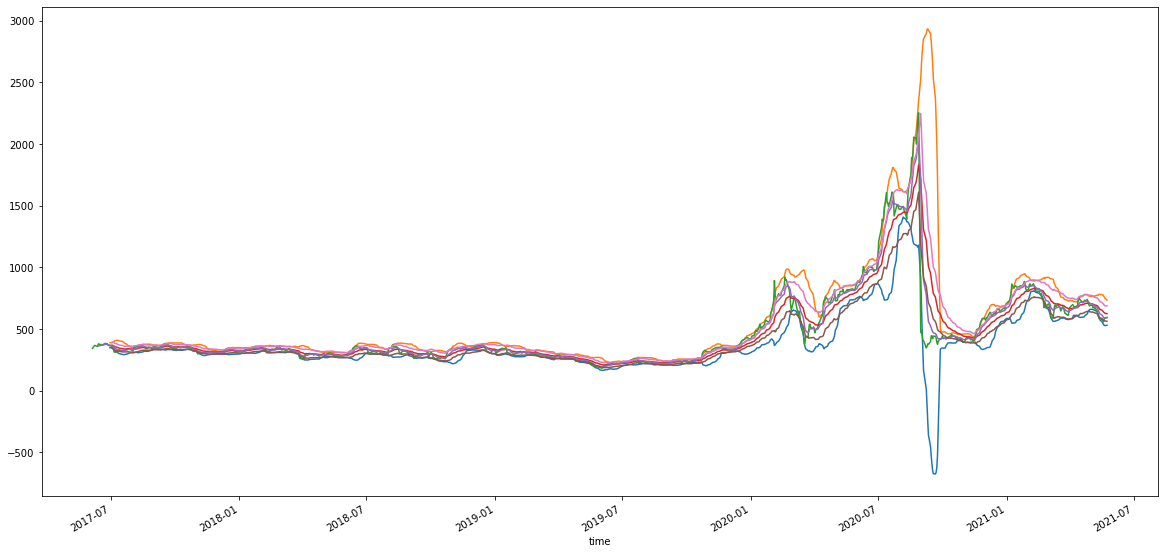

In [41]:
#PLotting the Bollinger Bands And Keltner channels 
ema21_ohlc4 = ta.ema(ta.ohlc4(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"]), length=8)
#PLotting the rest of data  
candles = ta.ha(tsla_df['TSLA']["open"], tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], offset=None)
bbands = ta.bbands(tsla_df['TSLA']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"], tsla_df['TSLA']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(tsla_df['TSLA']["high"], tsla_df['TSLA']["low"],  tsla_df['TSLA']["close"], length=21, scalar=2, mamode='ema', offset=0)
#figure size 
fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))


<AxesSubplot:xlabel='time'>

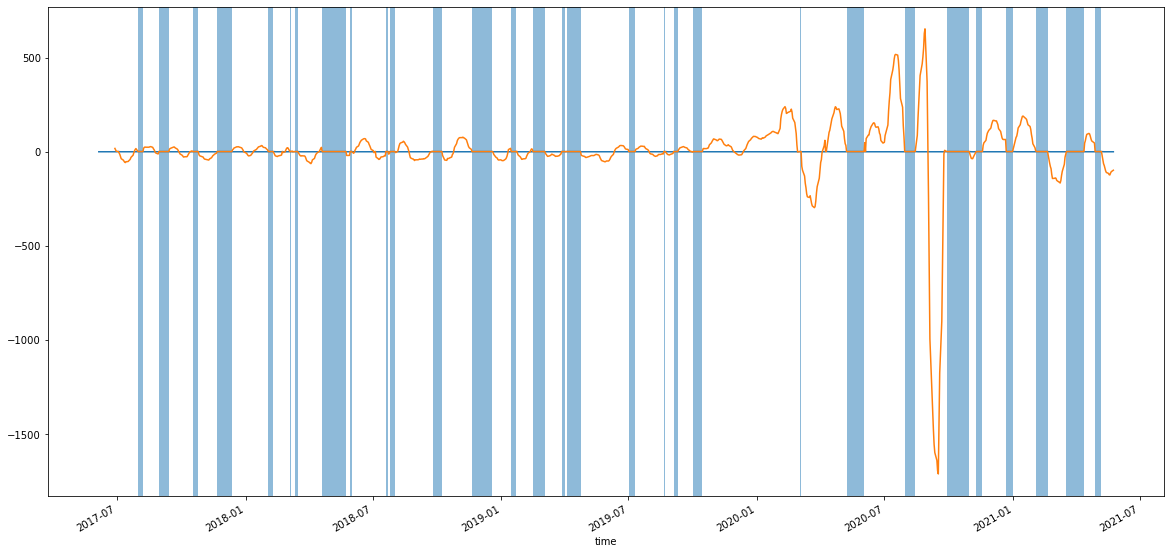

In [42]:
#Plotting the Squeeze for TSLA
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(tsla_df.index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(tsla_df.index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

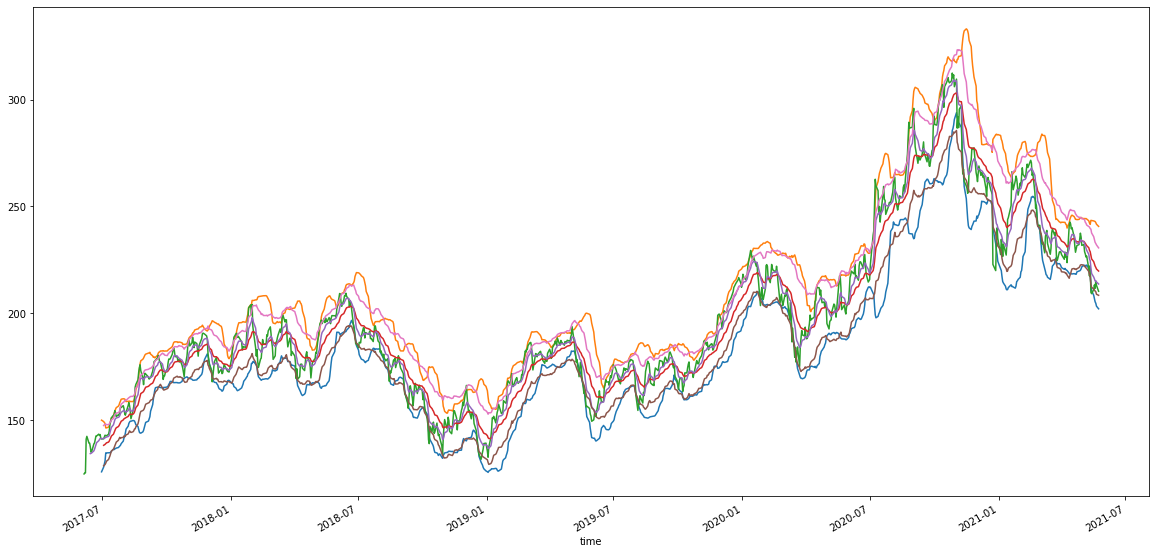

In [43]:
#PLotting the Bollinger Bands And Keltner channels 
ema21_ohlc4 = ta.ema(ta.ohlc4(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"]), length=8)
#Plotting more data 
candles = ta.ha(baba_df['BABA']["open"], baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], offset=None)
bbands = ta.bbands(baba_df['BABA']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(baba_df['BABA']["high"], baba_df['BABA']["low"], baba_df['BABA']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(baba_df['BABA']["high"], baba_df['BABA']["low"],  baba_df['BABA']["close"], length=21, scalar=2, mamode='ema', offset=0)
#PLotting figure size 
fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

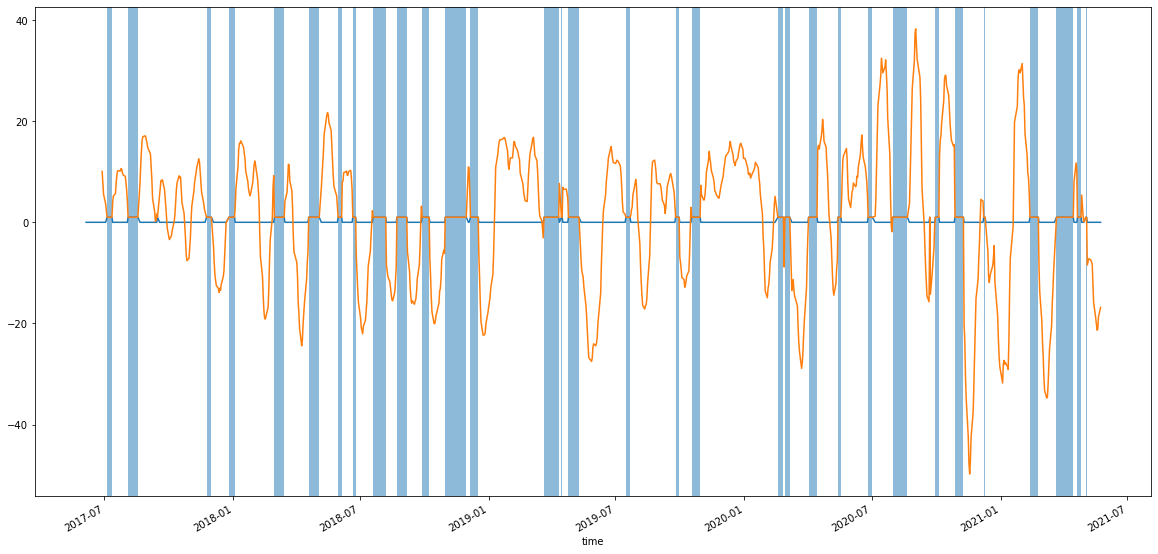

In [44]:
#Squeeze for BABA
squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(baba_df['BABA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(baba_df['BABA'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

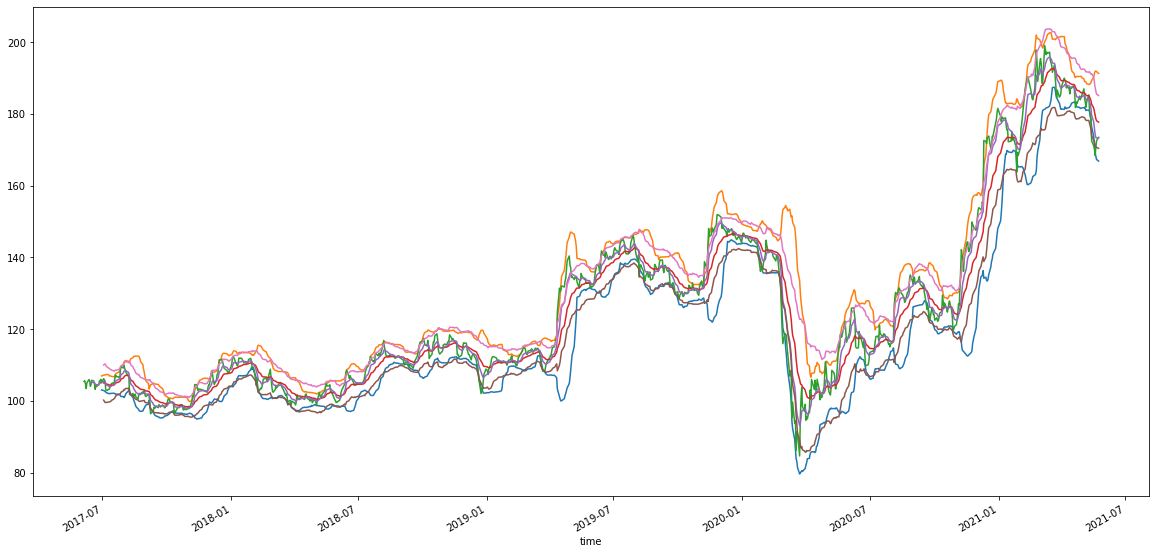

In [45]:
#PLotting the Bollinger Bands And Keltner channels 
ema21_ohlc4 = ta.ema(ta.ohlc4(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"]), length=8)
#Plotting more data
candles = ta.ha(dis_df['DIS']["open"], dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], offset=None)
bbands = ta.bbands(dis_df['DIS']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(dis_df['DIS']["high"], dis_df['DIS']["low"], dis_df['DIS']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(dis_df['DIS']["high"], dis_df['DIS']["low"],  dis_df['DIS']["close"], length=21, scalar=2, mamode='ema', offset=0)
#Plotting figure size 
fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

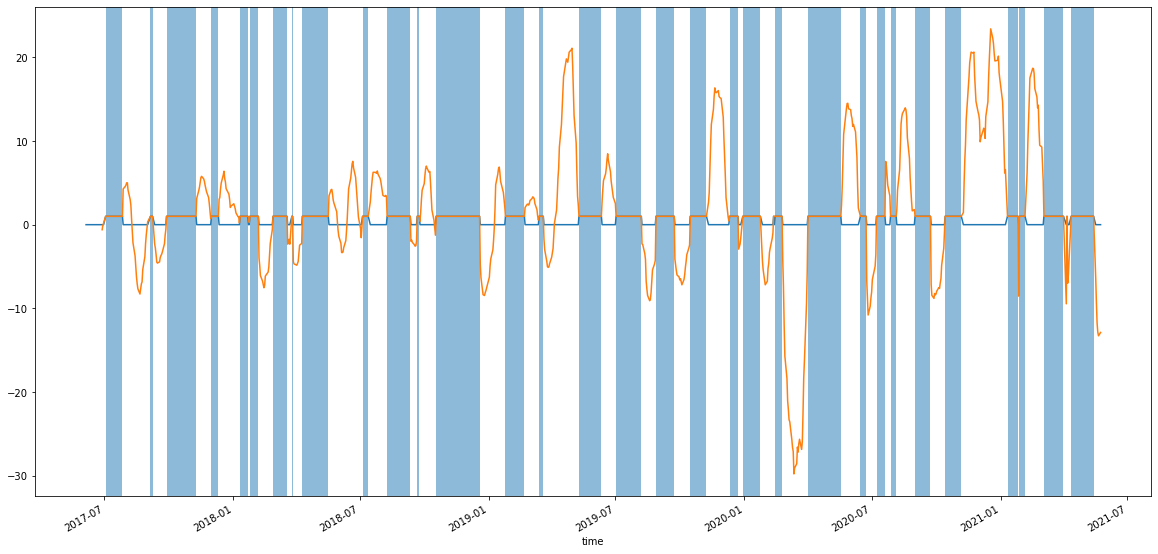

In [46]:
#Squeeze for DIS 

squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(dis_df['DIS'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(dis_df['DIS'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

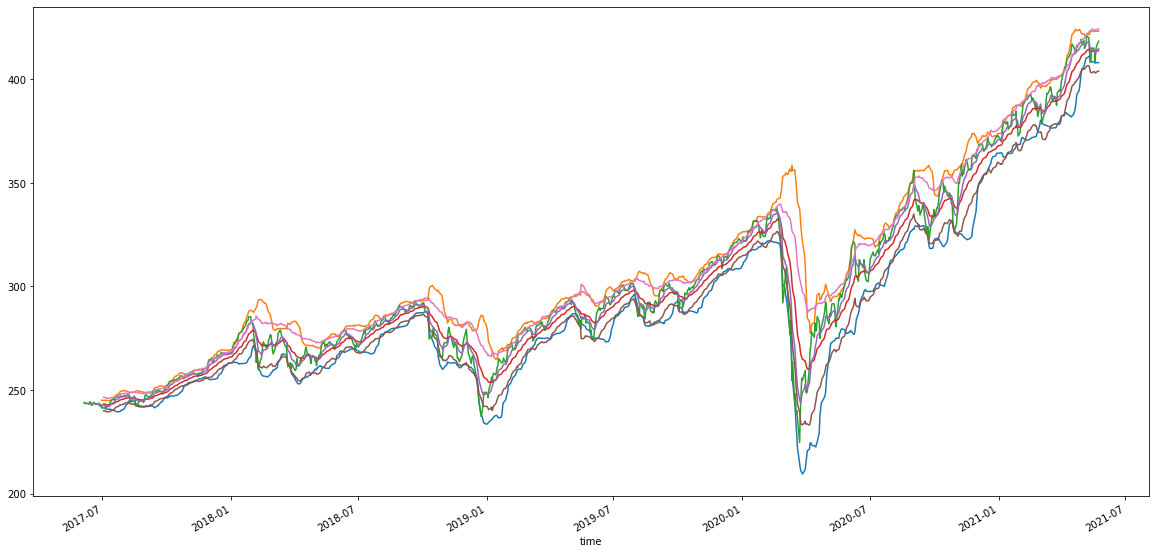

In [47]:
#PLotting the Bollinger Bands And Keltner channels 
ema21_ohlc4 = ta.ema(ta.ohlc4(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"]), length=21)
ema08_ohlc4 = ta.ema(ta.ohlc4(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"]), length=8)
#Plotting more data
candles = ta.ha(spy_df['SPY']["open"], spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], offset=None)
bbands = ta.bbands(spy_df['SPY']["close"], length=20, std=None, mamode=None, offset=None)
squeeze = ta.squeeze(spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], bb_length=20, bb_std=2, kc_length=21, kc_scalar=2, mom_length=12, mom_smooth=6, use_tr=None, offset=None)
tr = ta.atr(spy_df['SPY']["high"], spy_df['SPY']["low"], spy_df['SPY']["close"], length=14, mamode="ema", drift=1, offset=0)
kc = ta.kc(spy_df['SPY']["high"], spy_df['SPY']["low"],  spy_df['SPY']["close"], length=21, scalar=2, mamode='ema', offset=0)
#Plottin figure size 
fig = plt.figure()
bbands['BBL_20_2.0'].plot(figsize = (20,10))
bbands['BBU_20_2.0'].plot(figsize = (20,10))
candles['HA_close'].plot(figsize = (20,10))
ema21_ohlc4.plot(figsize = (20,10))
ema08_ohlc4.plot(figsize = (20,10))
kc['KCLe_21_2.0'].plot(figsize = (20,10))
kc['KCUe_21_2.0'].plot(figsize = (20,10))

<AxesSubplot:xlabel='time'>

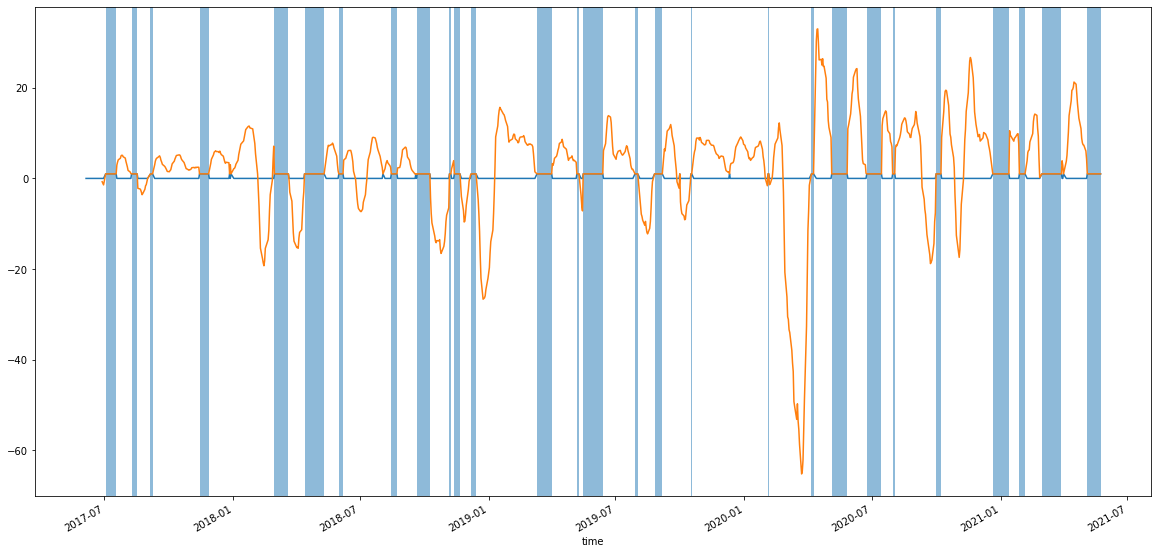

In [48]:
#Squeeze graph for SPY 

squeeze[squeeze['SQZ_ON']==1] = 1
fig, ax = plt.subplots()
ax.fill_between(spy_df['SPY'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
squeeze_on_dis = plt.plot(spy_df['SPY'].index, squeeze['SQZ_ON'])
squeeze_on_dis

squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))

In [49]:
#Defining all the plots for the dashboard. 

def density():
    density_figure = plt.figure()
    density_function = all_returns.plot.density(figsize=(20,10))
    plt.close(density_figure)
    return pn.pane.Matplotlib(density_figure)
def sharpe():
    sharpe_figure = plt.figure()
    sharpe_ratios_plot = all_sharpe_ratios.plot(kind="bar", title="Sharpe Ratios", figsize=(20,10))
    plt.close(sharpe_figure)
    return pn.pane.Matplotlib(sharpe_figure)
def beta_baba():
    beta_figure1 = plt.figure()
    beta_cov = plt.plot(baba_beta, label = "BABA")
    plt.close(beta_figure1)
    return pn.pane.Matplotlib(beta_figure1)
def beta_tsla():
    beta_figure2 = plt.figure()
    beta_cov = plt.plot(tsla_beta, label = "TSLA")
    plt.close(beta_figure2)
    return pn.pane.Matplotlib(beta_figure2)
def beta_dis():
    beta_figure3 = plt.figure()
    beta_cov = plt.plot(dis_beta, label = "DIS")
    plt.close(beta_figure3)
    return pn.pane.Matplotlib(beta_figure3)
def heatmap():
    heatmap_figure = plt.figure()
    sns1 = sns.heatmap(all_correlation, vmin = -1, vmax = 1, annot = True)
    plt.close(heatmap_figure)
    return pn.pane.Matplotlib(heatmap_figure)


def figure_dis():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    plt.close(fig)
    return fig
def squeeze_dis():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(dis_df['DIS'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_on_dis = plt.plot(dis_df['DIS'].index, squeeze['SQZ_ON'])
    sqz = squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig
def figure_spy():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    return fig
def squeeze_spy():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(spy_df['SPY'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.4, transform=ax.get_xaxis_transform())
    squeeze_on = plt.plot(spy_df['SPY'].index,squeeze['SQZ_ON'])
    squeeze_on
    squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig
def figure_baba():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    plt.close(fig)
    return fig
def squeeze_baba():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(baba_df['BABA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_on_dis = plt.plot(baba_df['BABA'].index, squeeze['SQZ_ON'])
    sqz = squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig
def figure_tsla():
    fig = plt.figure()
    bbands['BBL_20_2.0'].plot(figsize = (20,10))
    bbands['BBU_20_2.0'].plot(figsize = (20,10))
    candles['HA_close'].plot(figsize = (20,10))
    ema21_ohlc4.plot(figsize = (20,10))
    ema08_ohlc4.plot(figsize = (20,10))
    kc['KCLe_21_2.0'].plot(figsize = (20,10))
    kc['KCUe_21_2.0'].plot(figsize = (20,10))
    plt.close(fig)
    return fig
def squeeze_tsla():
    squeeze[squeeze['SQZ_ON']==1] = 1
    fig, ax = plt.subplots()
    ax.fill_between(tsla_df['TSLA'].index, 0, 1, where=squeeze['SQZ_ON'], alpha=0.5, transform=ax.get_xaxis_transform())
    squeeze_on_dis = plt.plot(tsla_df['TSLA'].index, squeeze['SQZ_ON'])
    sqz = squeeze['SQZ_20_2.0_21_2.0'].plot(figsize = (20,10))
    return fig

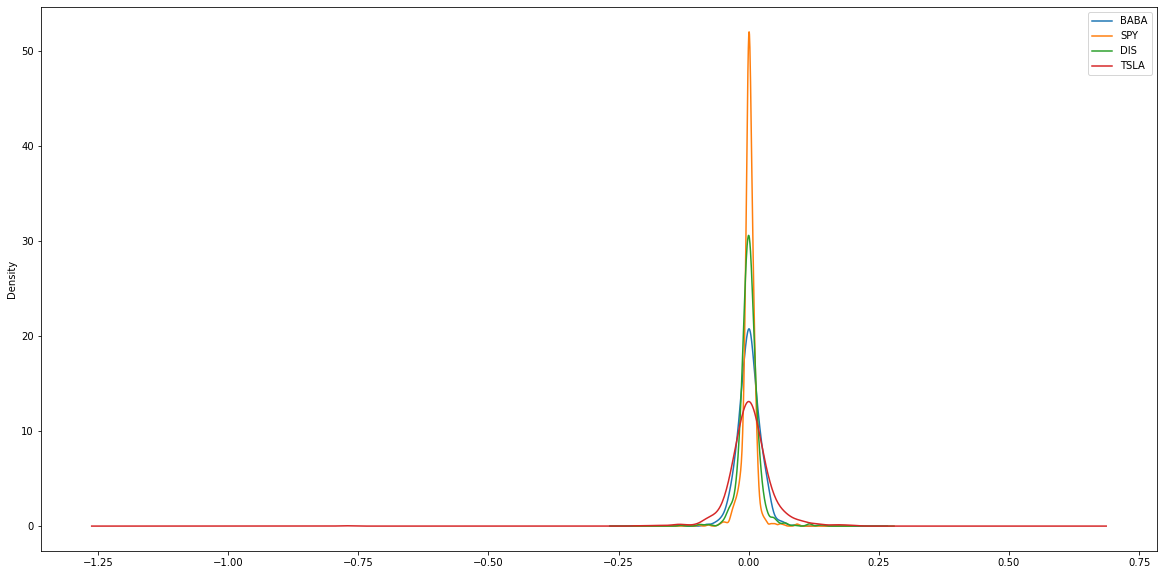

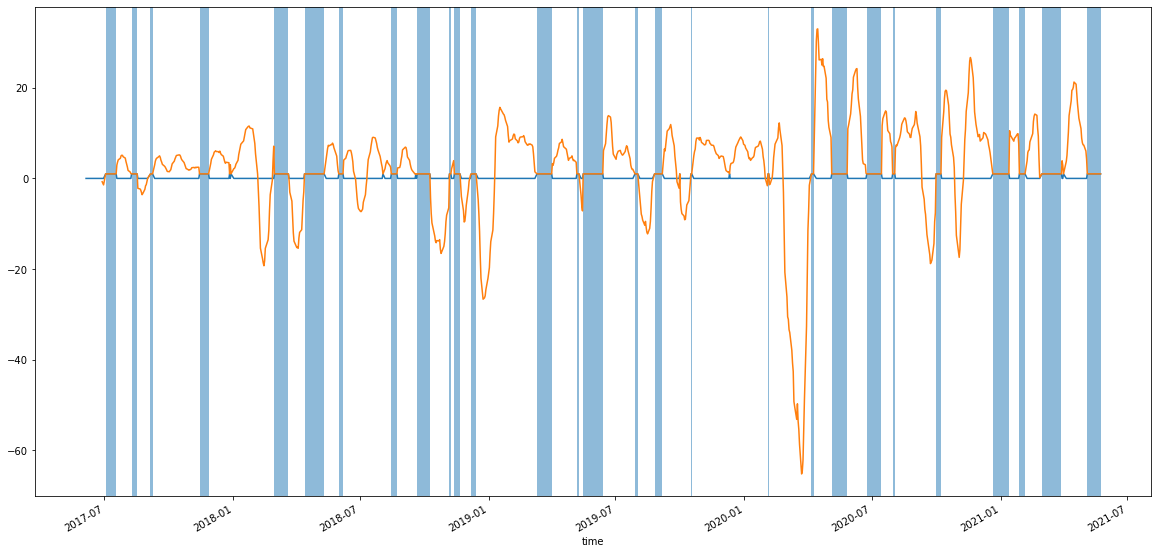

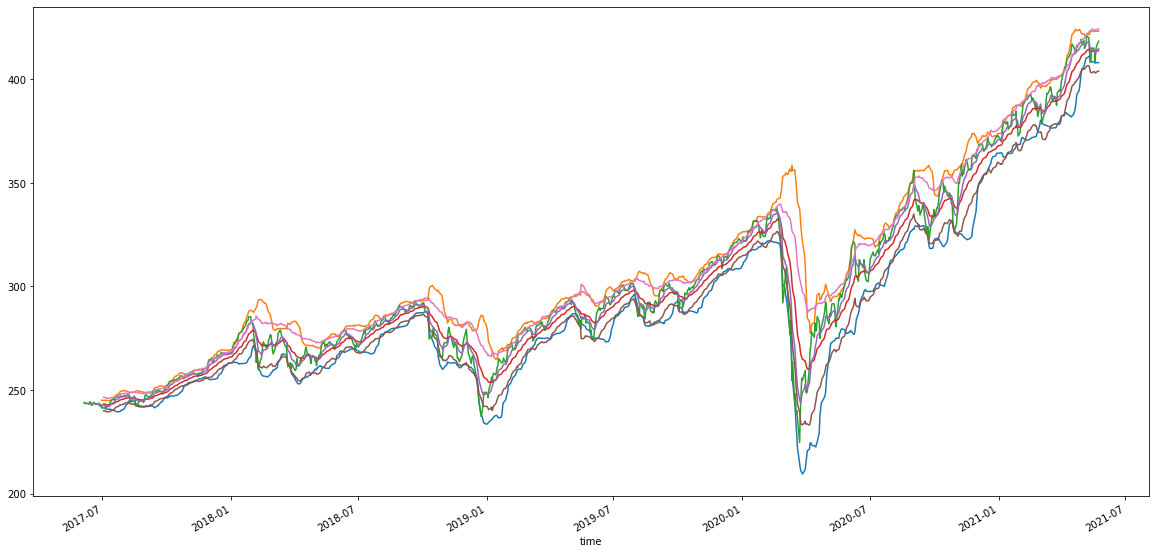

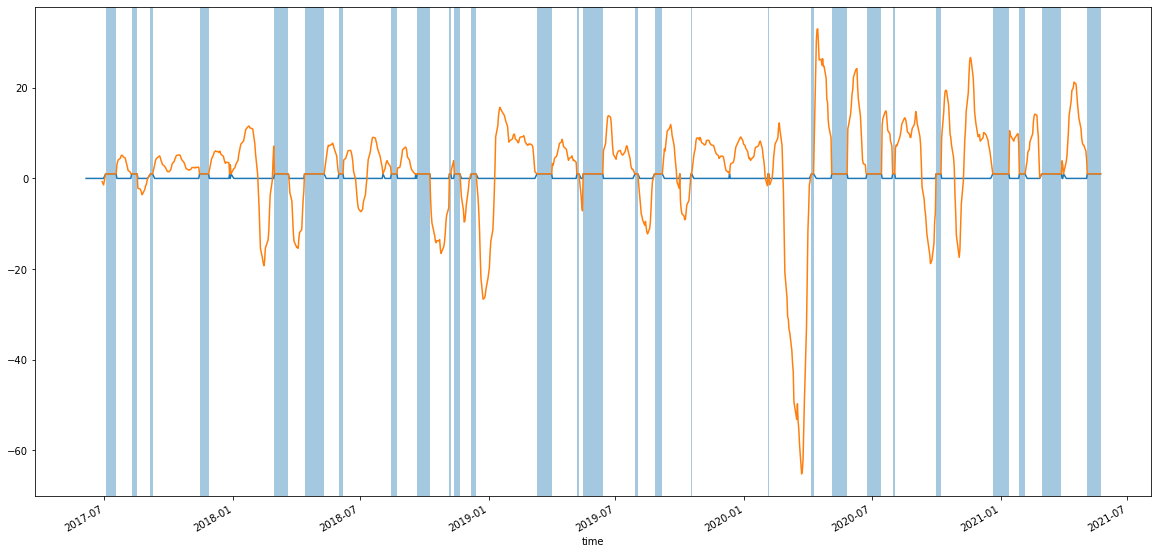

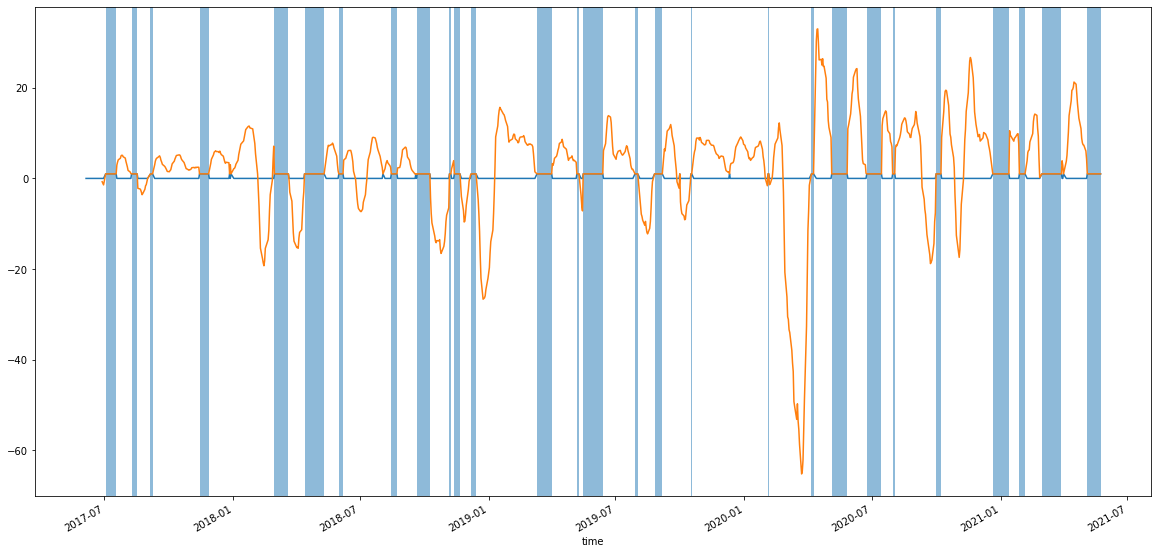

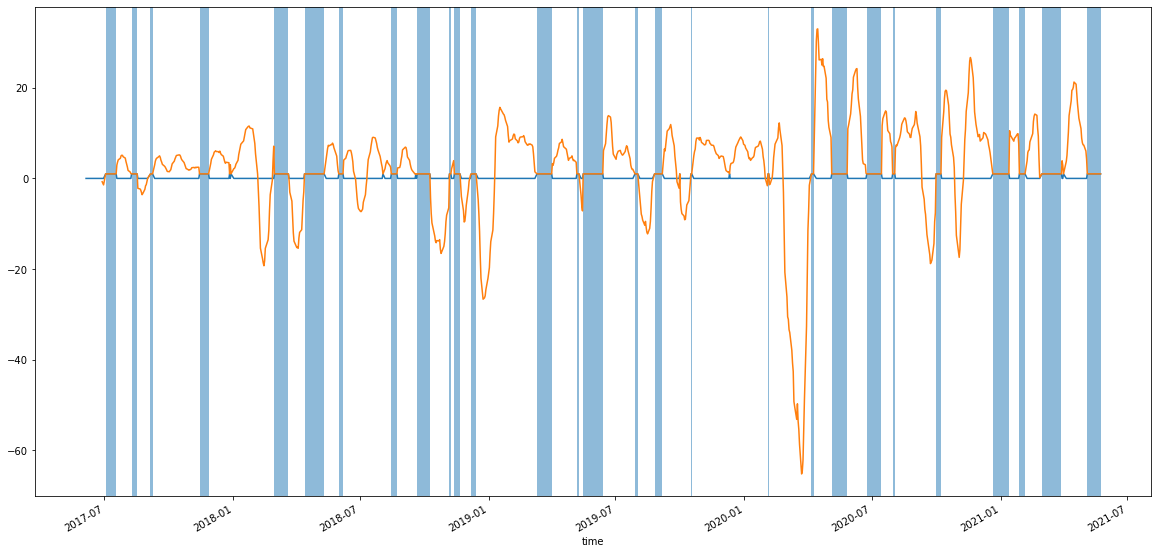

In [52]:
# Create a Title for the Dashboard
title = 'Analysis of Stocks'
stock_info = pn.Column(title, density(), sharpe(), beta_baba(), beta_tsla(), beta_dis(), heatmap()) 
# Create a tab layout for the dashboard
disney_tab = pn.Column(figure_dis(), squeeze_dis())
spy_tab = pn.Column(figure_spy(), squeeze_spy())
tsla_tab = pn.Column(figure_tsla(), squeeze_tsla())
baba_tab = pn.Column(figure_baba(), squeeze_baba())
# Create the dashboard
SF_dashboard = pn.Tabs(("Stock Info", stock_info),
("Disney Analysis", disney_tab),
("SPY Analysis", spy_tab),
('Tesla Analysis', tsla_tab),
('Baba Analysis', baba_tab))


In [ ]:
#Display the Dashboard
SF_dashboard